## Reinforcement Learning

### The Multi Arm Bandit Problem
Suppose you have 10 ads for a product, now you distribute yours ads for the advertisement. You are randomly, distributing your ads, but this is not an efficient way, you should have the distribution according to the audience preference, So you must know which ads is good, and which is not. 

<img src="../The_Multi_Armed_Bandit_Problem.png"/>

### Upper Confiednce Bound Algorithm
<img src="./Upper_Confiednce_Bound_Algorithm.png"/>


In [2]:
# importing modules and Datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("./Datasets/Ads_CTR_Optimisation.csv")
X =  dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

print(X)
print(y)

[[1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]]
[0 0 0 ... 0 0 0]


### Implementing Upper Confidence Bound (UCB)

In [20]:
import math
N = dataset.shape[0] #10000
d = dataset.shape[1] #10
ads_selected = []
no_of_selections = [0] * d
sum_of_rewards =[0] * d
total_reward = 0
for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if no_of_selections[i] > 0:
            average_reward = sum_of_rewards[i] / no_of_selections[i]
            delta_i = math.sqrt((3*math.log(n+1))/(2*no_of_selections[i]))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        
        if upper_bound > max_upper_bound :
            max_upper_bound = upper_bound
            ad = i
    # print(no_of_selections,ad)
    ads_selected.append(ad)
    reward = dataset.values[ n, ad]
    no_of_selections[ad] += 1
    sum_of_rewards[ad] += reward
    total_reward += reward
    

#### Visualize the Result

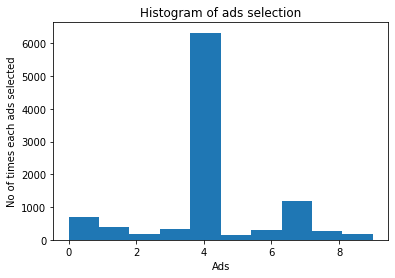

In [21]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('No of times each ads selected')
plt.show()